# Explore panel data with R

## Load libraries

In [ ]:
# Load libraries
suppressWarnings(suppressMessages({
  library(knitr)
  library(kableExtra)
  library(htmltools)
  library(tidyverse)
  library(scales)
  library(ExPanDaR)
}))
knitr::opts_chunk$set(fig.align = 'center')


## Import data

In [ ]:
# Import data from the book of Mendez (2020)
dat <- read_csv("https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  country = col_character(),
  region = col_character(),
  hi1990 = col_character(),
  isocode = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [ ]:
dat %>%
 head()

id,country,year,Y,K,pop,L,s,alpha_it,GDPpc,⋯,log_h_raw,log_tfp_raw,log_GDPpc,log_lp,log_ky,log_h,log_tfp,region,hi1990,isocode
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
62,Mozambique,1990,7034.000,6262,13.37197,5.413710,0.9964694,0.5737705,526.0256,⋯,0.2979364,5.317899,6.163751,7.050233,-0.1290631,0.2770405,5.257494,Africa,no,MOZ
62,Mozambique,1991,7742.999,6462,13.71985,5.593190,0.9829382,0.5737705,564.3646,⋯,0.2953772,5.393640,6.195724,7.075745,-0.1301618,0.2796887,5.286922,Africa,no,MOZ
62,Mozambique,1992,6792.000,6592,14.20399,5.844729,0.9694070,0.5737705,478.1756,⋯,0.2928047,5.242355,6.227951,7.101554,-0.1312285,0.2823892,5.316501,Africa,no,MOZ
62,Mozambique,1993,7223.000,6859,14.77588,6.187860,0.9558758,0.5737705,488.8373,⋯,0.2902188,5.272804,6.261036,7.128354,-0.1323578,0.2852334,5.346648,Africa,no,MOZ
62,Mozambique,1994,8194.000,7246,15.36307,6.513672,0.9423445,0.5737705,533.3571,⋯,0.2876196,5.364747,6.295438,7.156726,-0.1333913,0.2883388,5.377597,Africa,no,MOZ
62,Mozambique,1995,7671.000,7734,15.91310,6.804721,0.9288133,0.5737705,482.0556,⋯,0.2850060,5.263721,6.331443,7.187088,-0.1339684,0.2918353,5.409395,Africa,no,MOZ


In [ ]:
# Import data definitions
dat_def <- read_csv("https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat-definitions.csv")
dat_def


── Column specification ────────────────────────────────────────────────────────
cols(
  var_name = col_character(),
  var_def = col_character(),
  type = col_character()
)




var_name,var_def,type
<chr>,<chr>,<chr>
country,Standardized country name (from PWT),cs_id
year,Year,ts_id
Y,GDP,numeric
K,Physical Capital,numeric
pop,Population,numeric
L,Labor Force,numeric
s,Years of Schooling,numeric
alpha_it,Variable Capital Share,numeric
GDPpc,GDP per capita,numeric


## Bar chart

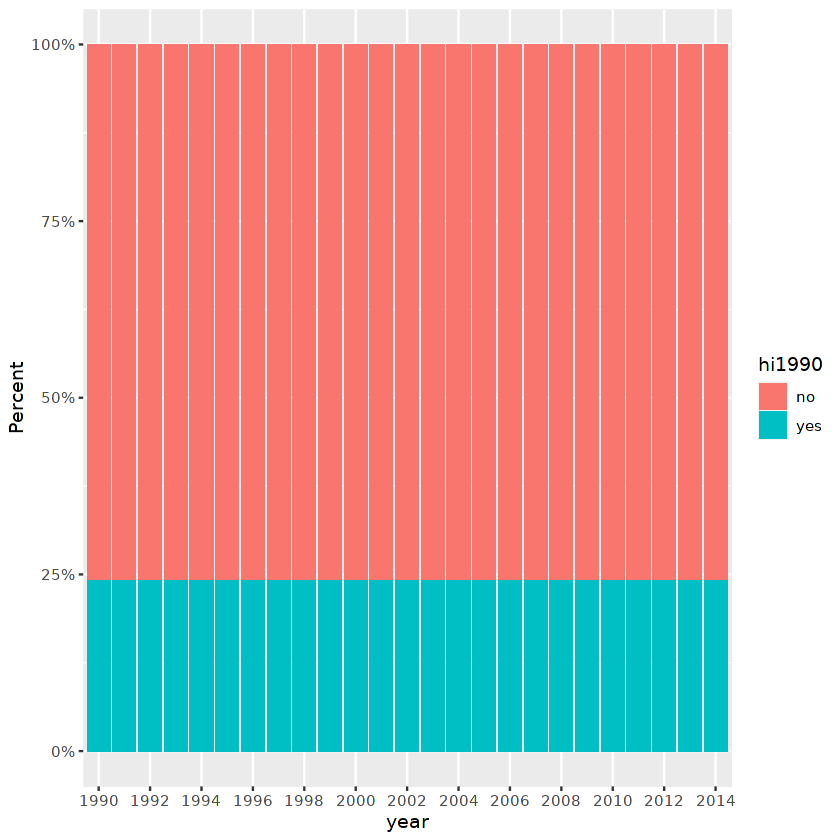

In [ ]:
df <- dat
df$year <- as.factor(df$year)
df$hi1990 <- as.factor(df$hi1990)
p <- ggplot(df, aes(x = year)) +
  geom_bar(aes(fill = hi1990), position = "fill") +
  labs(x = "year", fill = "hi1990", y = "Percent") +
  scale_y_continuous(labels = percent_format()) 
p <- p + scale_x_discrete(breaks = pretty(as.numeric(as.character(df$year)), n = 10))
p

## Missing values

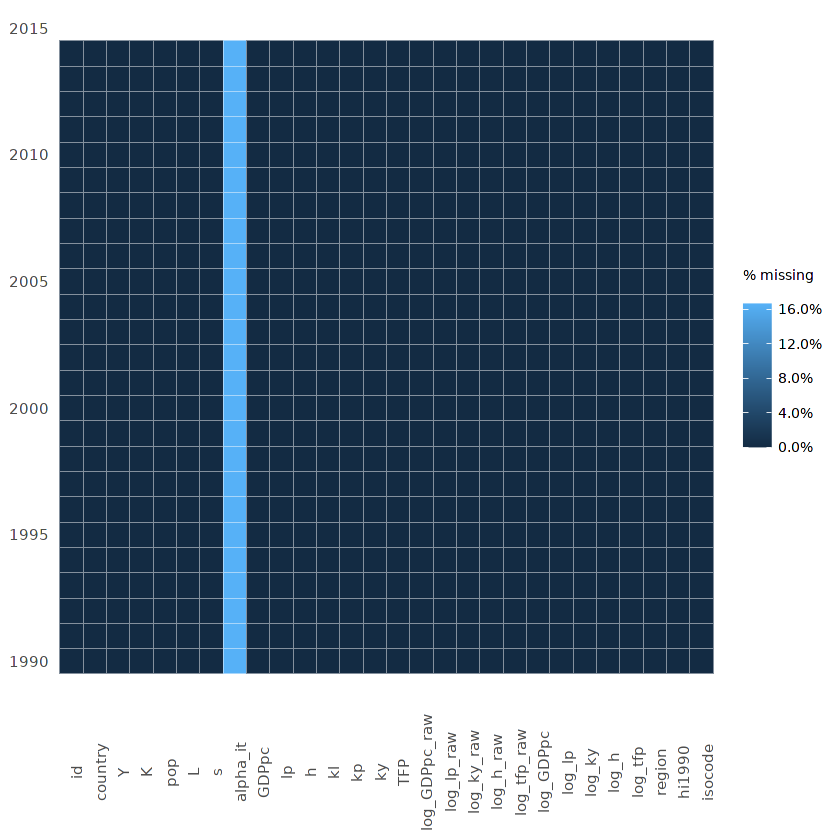

In [ ]:
df <- dat
prepare_missing_values_graph(df, "year")

## Descriptive statistics

In [ ]:
df <- dat[df$year == "1990", ]
t <- prepare_descriptive_table(df)

# Create a function to round the decimals of a df
round_df <- function(x, digits) {
    # round all numeric variables
    # x: data frame 
    # digits: number of digits to round
    numeric_columns <- sapply(x, mode) == 'numeric'
    x[numeric_columns] <-  round(x[numeric_columns], digits)
    x
}

round_df(t$df, 2)

,N,Mean,Std. dev.,Min.,25 %,Median,75 %,Max.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,108,54.50,31.32,1.00,27.75,54.50,81.25,108.00
year,108,1990.00,0.00,1990.00,1990.00,1990.00,1990.00,1990.00
Y,108,364598.14,1030271.05,3067.00,19377.75,76730.50,234608.00,9259567.00
K,108,962050.80,2873937.94,2004.00,31131.00,162679.00,713896.25,26453210.00
pop,108,45.41,140.67,1.57,5.11,10.35,34.44,1154.61
L,108,19.51,69.00,0.70,2.06,4.35,12.22,637.07
s,108,6.50,2.90,0.89,4.16,6.98,8.79,12.20
alpha_it,90,0.43,0.11,0.15,0.35,0.43,0.49,0.77
GDPpc,108,9784.00,9475.93,526.03,2103.65,6126.90,16453.11,37503.44


## Histogram

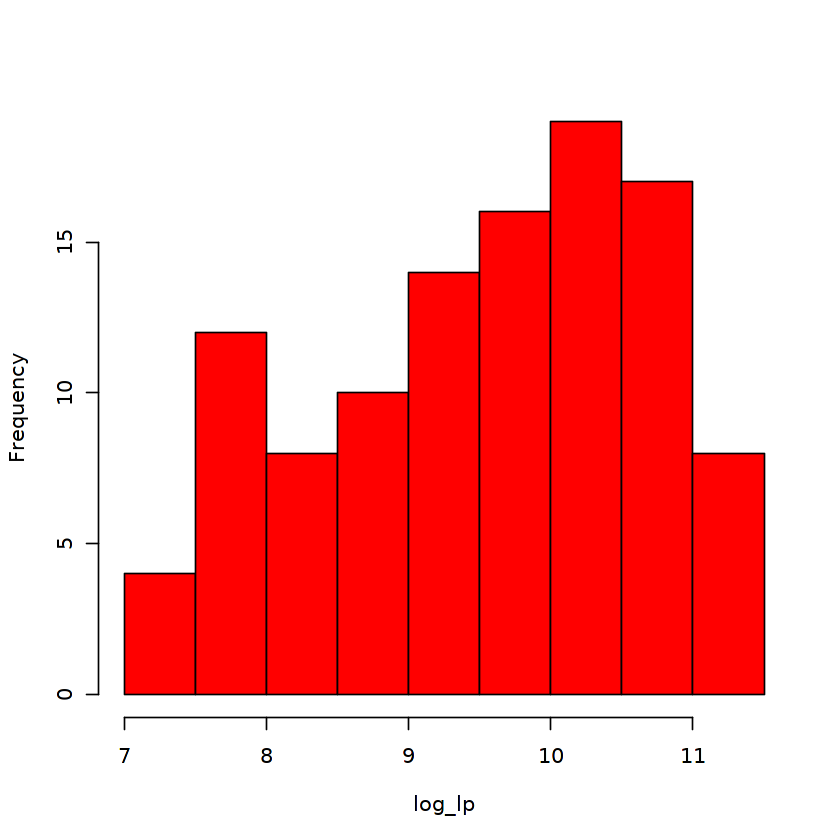

In [ ]:
var <- as.numeric(dat$log_lp[dat$year == "1990"])
hist(var, main="", xlab = "log_lp", col="red", right = FALSE, breaks= 10)

## Extreme values table

In [ ]:
t <- prepare_ext_obs_table(dat, n = 10,
                           cs_id = "country",
                           ts_id = "year",
                           var = "log_lp")
t$df

,country,year,log_lp
,<chr>,<dbl>,<dbl>
2700,Norway,2014,11.984427
2699,Norway,2013,11.958503
2698,Norway,2012,11.932280
2697,Norway,2011,11.905351
2696,Norway,2010,11.877324
2695,Saudi Arabia,2014,11.871549
2694,Norway,2009,11.847876
2693,Saudi Arabia,2013,11.820003
2692,Norway,2008,11.816551


## By group: Bar graph

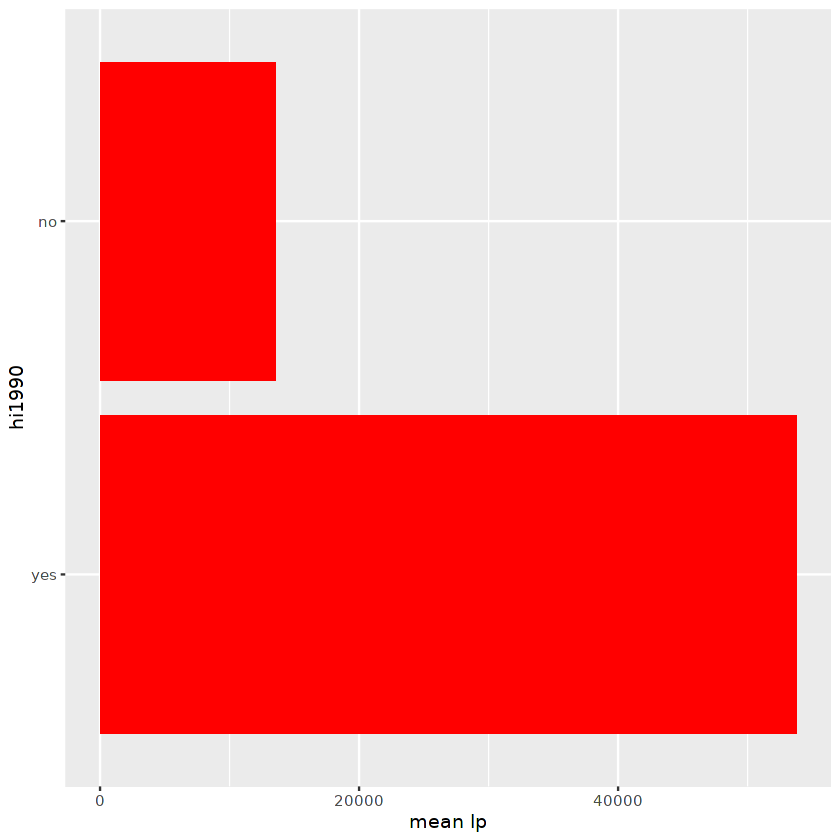

In [ ]:
df <- dat
df <- df[df$year == "1990", ]
prepare_by_group_bar_graph(df, "hi1990", "lp", mean, TRUE)$plot +
  ylab("mean lp")

## By group: Violin plot

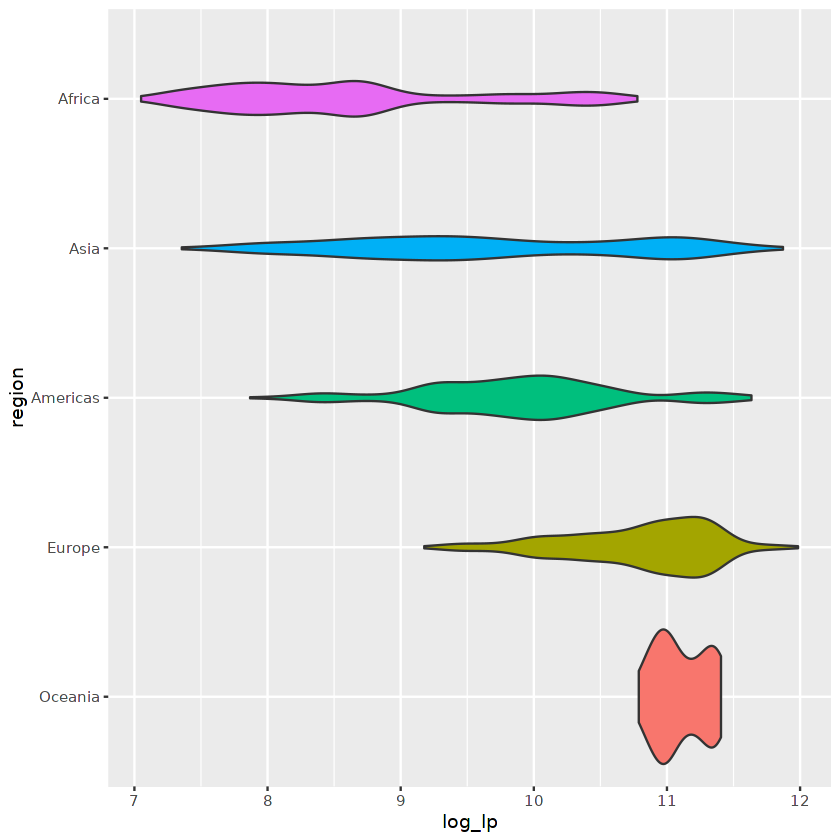

In [ ]:
df <- dat
prepare_by_group_violin_graph(df, "region", "log_lp", TRUE)

## Trend graph

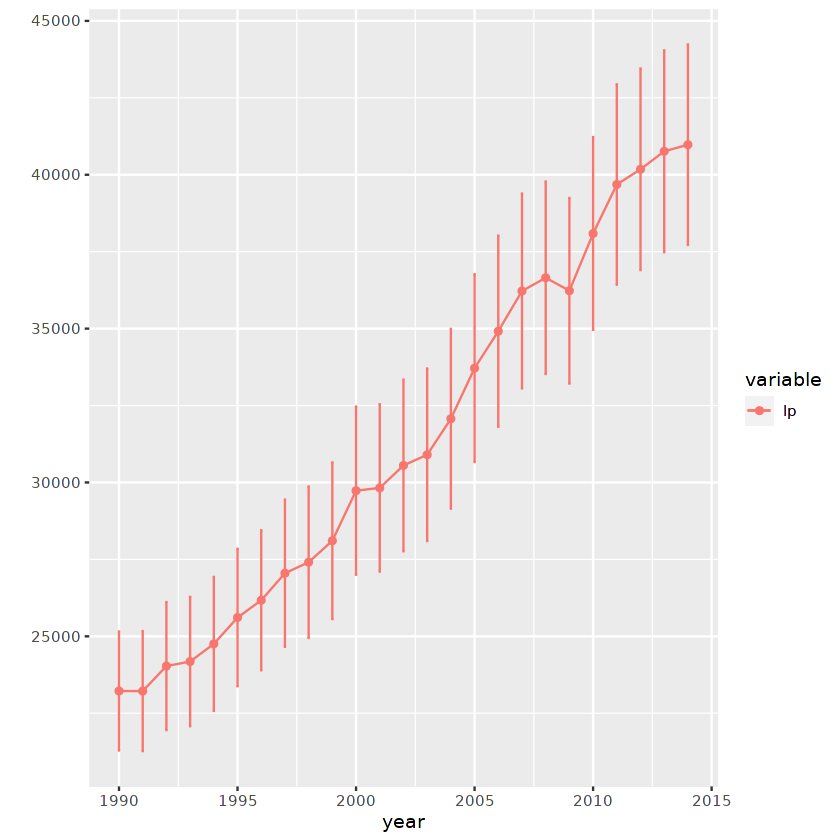

In [ ]:
df <- dat
prepare_trend_graph(df, "year", c("lp"))$plot

## Quantile trend graph

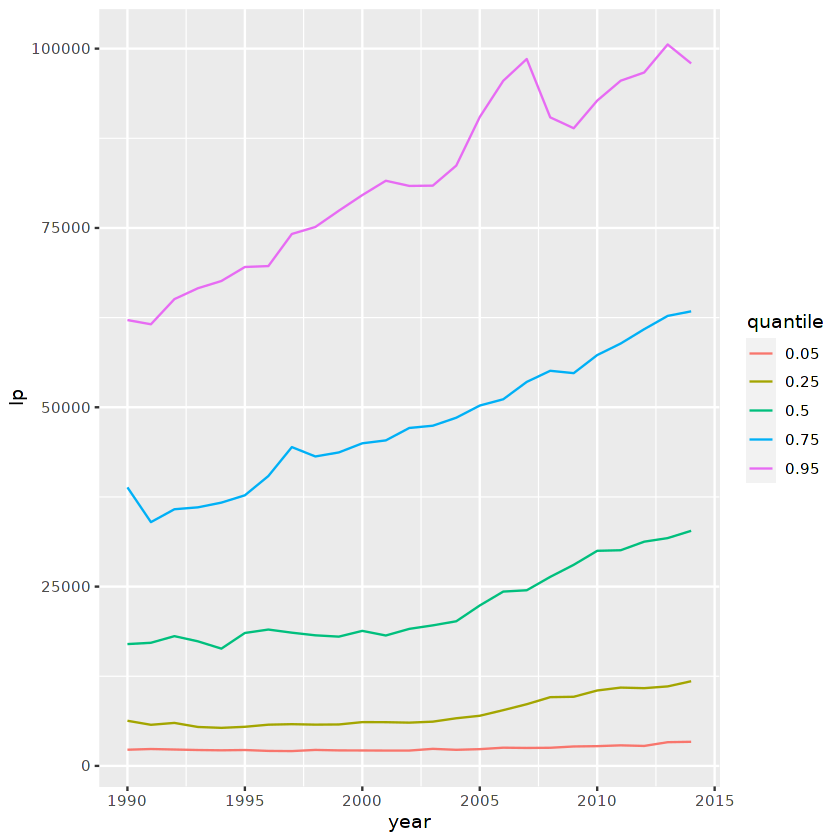

In [ ]:
df <- dat
prepare_quantile_trend_graph(df, "year", c(0.05, 0.25, 0.5, 0.75, 0.95), "lp", points = FALSE)$plot

## Correlation matrix

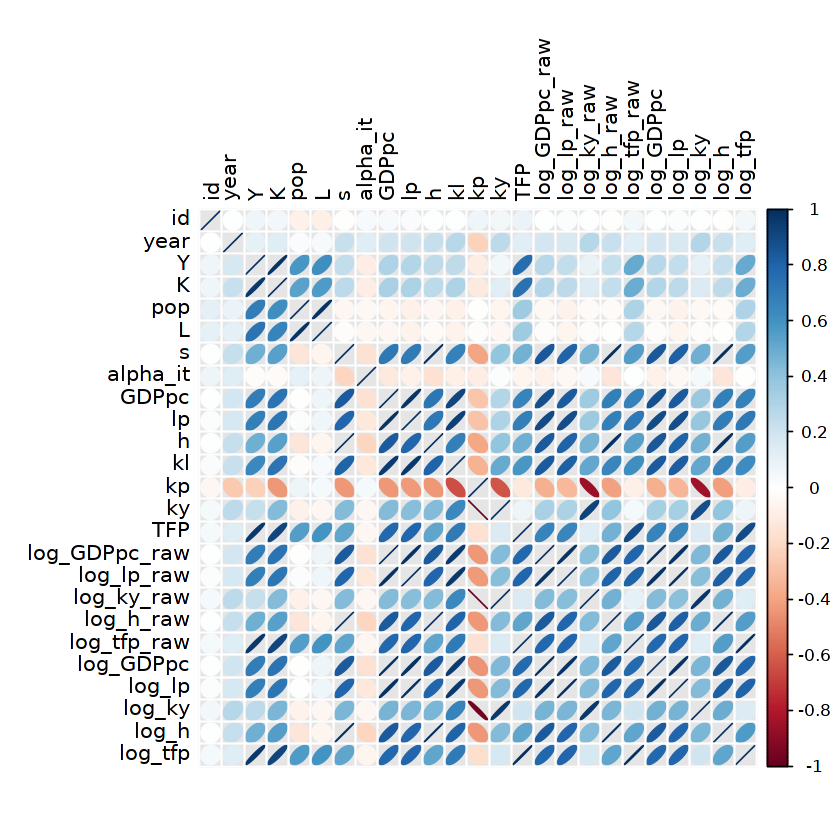

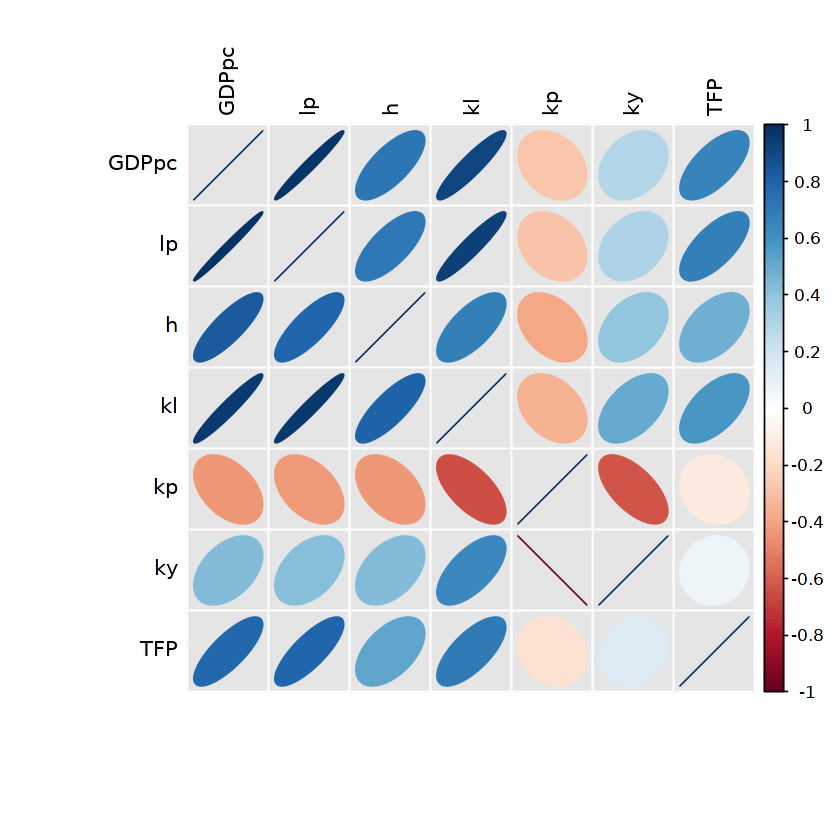

In [ ]:
df <- dat
ret <- prepare_correlation_graph(df)
ret2 <- prepare_correlation_graph(df[, c(10, 11, 12, 13, 14, 15, 16)])

## Scatterplot 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



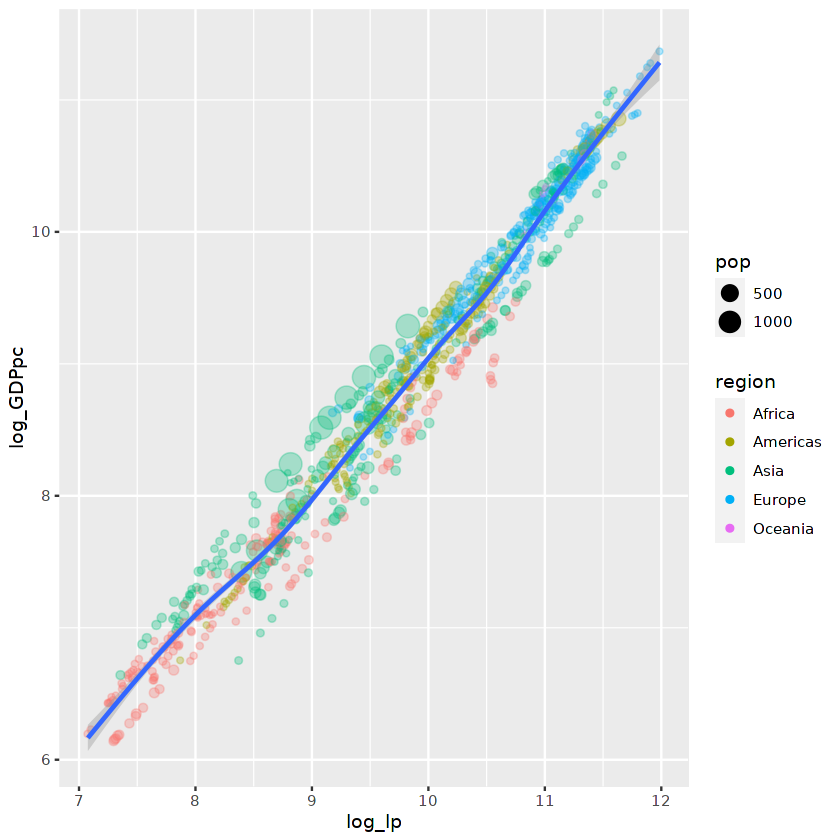

In [ ]:
df <- dat
df <- df[, c("country", "year", "log_lp", "log_GDPpc", "region", "pop")]
df <- df[complete.cases(df), ]
df$region <- as.factor(df$region)
set.seed(42)
df <- sample_n(df, 1000)
prepare_scatter_plot(df, "log_lp", "log_GDPpc", color = "region", size = "pop", loess = 1)

## Regression table

In [ ]:
df <- dat
df <- df[, c("log_lp", "log_ky", "log_h", "log_tfp", "country", "year", "hi1990")]
df <- df[complete.cases(df), ]
df$hi1990 <- as.factor(df$hi1990)
df <- droplevels(df)
t <- prepare_regression_table(df, dvs = "log_lp", idvs = c("log_ky", "log_h", "log_tfp"), feffects = c("country", "year"), clusters = c("country", "year"), byvar = "hi1990", models = "ols", format = "text")
t

$models
$models[[1]]
$models[[1]]$model

Model Formula: log_lp ~ log_ky + log_h + log_tfp
<environment: 0x55eebcd4c178>

Coefficients:
 log_ky   log_h log_tfp 
0.47182 0.22569 1.44690 


$models[[1]]$type_str
[1] "ols"

$models[[1]]$fe_str
[1] "country, year"

$models[[1]]$cl_str
[1] "country, year"

$models[[1]]$p
       log_ky         log_h       log_tfp 
 2.524332e-51  8.698143e-02 6.546745e-212 

$models[[1]]$se
    log_ky      log_h    log_tfp 
0.03061389 0.13181026 0.04226128 

$models[[1]]$omit_vars
NULL

$models[[1]]$byvalue
[1] "Full Sample"


$models[[2]]
$models[[2]]$model

Model Formula: log_lp ~ log_ky + log_h + log_tfp
<environment: 0x55eeca894468>

Coefficients:
 log_ky   log_h log_tfp 
0.48272 0.18284 1.50339 


$models[[2]]$type_str
[1] "ols"

$models[[2]]$fe_str
[1] "country, year"

$models[[2]]$cl_str
[1] "country, year"

$models[[2]]$p
       log_ky         log_h       log_tfp 
 7.936025e-48  2.756112e-01 3.362078e-177 

$models[[2]]$se
    log_ky      log_h    log_